# Machine Learning Project - Rainfall prediction

## 1. Exploration the data

As usual, we load some important and useful libraries for data loading and data visualization

In [3]:
library(ggplot2)
library(tidyr)
library(gridExtra)

We load the dataset as a dataframe

In [4]:
rain = read.delim("rain_project.txt", sep = " ")

In [5]:
summary(rain)

      Id                date                 ff               t        
 Length:688         Length:688         Min.   : 1.158   Min.   :269.5  
 Class :character   Class :character   1st Qu.: 2.870   1st Qu.:279.9  
 Mode  :character   Mode  :character   Median : 3.859   Median :283.2  
                                       Mean   : 4.082   Mean   :283.7  
                                       3rd Qu.: 4.970   3rd Qu.:287.6  
                                       Max.   :12.500   Max.   :299.5  
       td              hu               dd             precip      
 Min.   :267.1   Min.   : 46.75   Min.   : 32.92   Min.   : 0.000  
 1st Qu.:277.6   1st Qu.: 80.53   1st Qu.:158.74   1st Qu.: 0.000  
 Median :281.2   Median : 86.40   Median :222.81   Median : 0.400  
 Mean   :281.1   Mean   : 85.56   Mean   :206.58   Mean   : 2.384  
 3rd Qu.:284.7   3rd Qu.: 92.06   3rd Qu.:260.68   3rd Qu.: 2.600  
 Max.   :291.1   Max.   :100.00   Max.   :343.04   Max.   :34.500  
    ws_arome        

In [6]:
head(rain)

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,22092001_527,2017-06-11,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,22092001_363,2016-12-29,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


In [7]:
rain[, "Id"] <- as.factor(rain[, "Id"])
rain[, "date"] <- as.factor(rain[, "date"])
rain[, "rain_class"] <- as.factor(rain[, "rain_class"])

## Elementary Explorations

In [8]:
names(rain)

[1] "Id"          "date"        "ff"          "t"           "td"         
 [6] "hu"          "dd"          "precip"      "ws_arome"    "p3031_arome"
[11] "u10_arome"   "v10_arome"   "t2m_arome"   "d2m_arome"   "r_arome"    
[16] "tp_arome"    "msl_arome"   "rain"        "rain_class"

In [9]:
# Numerical variables
num_var = names(rain)[-c(1,2,19)]
qual_var = names(rain)[c(1,2,19)]

In [10]:
num_var

[1] "ff"          "t"           "td"          "hu"          "dd"         
 [6] "precip"      "ws_arome"    "p3031_arome" "u10_arome"   "v10_arome"  
[11] "t2m_arome"   "d2m_arome"   "r_arome"     "tp_arome"    "msl_arome"  
[16] "rain"

### Histogram to see the distributions of variables

In [44]:
ColHist = function(data, col_name)
{
    hist =  ggplot(data = data, aes_string(x = col_name)) + geom_histogram(binwidth=.2, color="black", fill="white")
    return(hist)
}

In [22]:
length(num_var)

[1] 16

In [53]:
l = list(145, 5456)
l[[1]]

[1] 145

In [67]:
mean(rain[, num_var[1]])

[1] 4.082196

In [74]:
lapply(list(1,2,3), function(x){x*2})

[[1]]
[1] 2

[[2]]
[1] 4

[[3]]
[1] 6

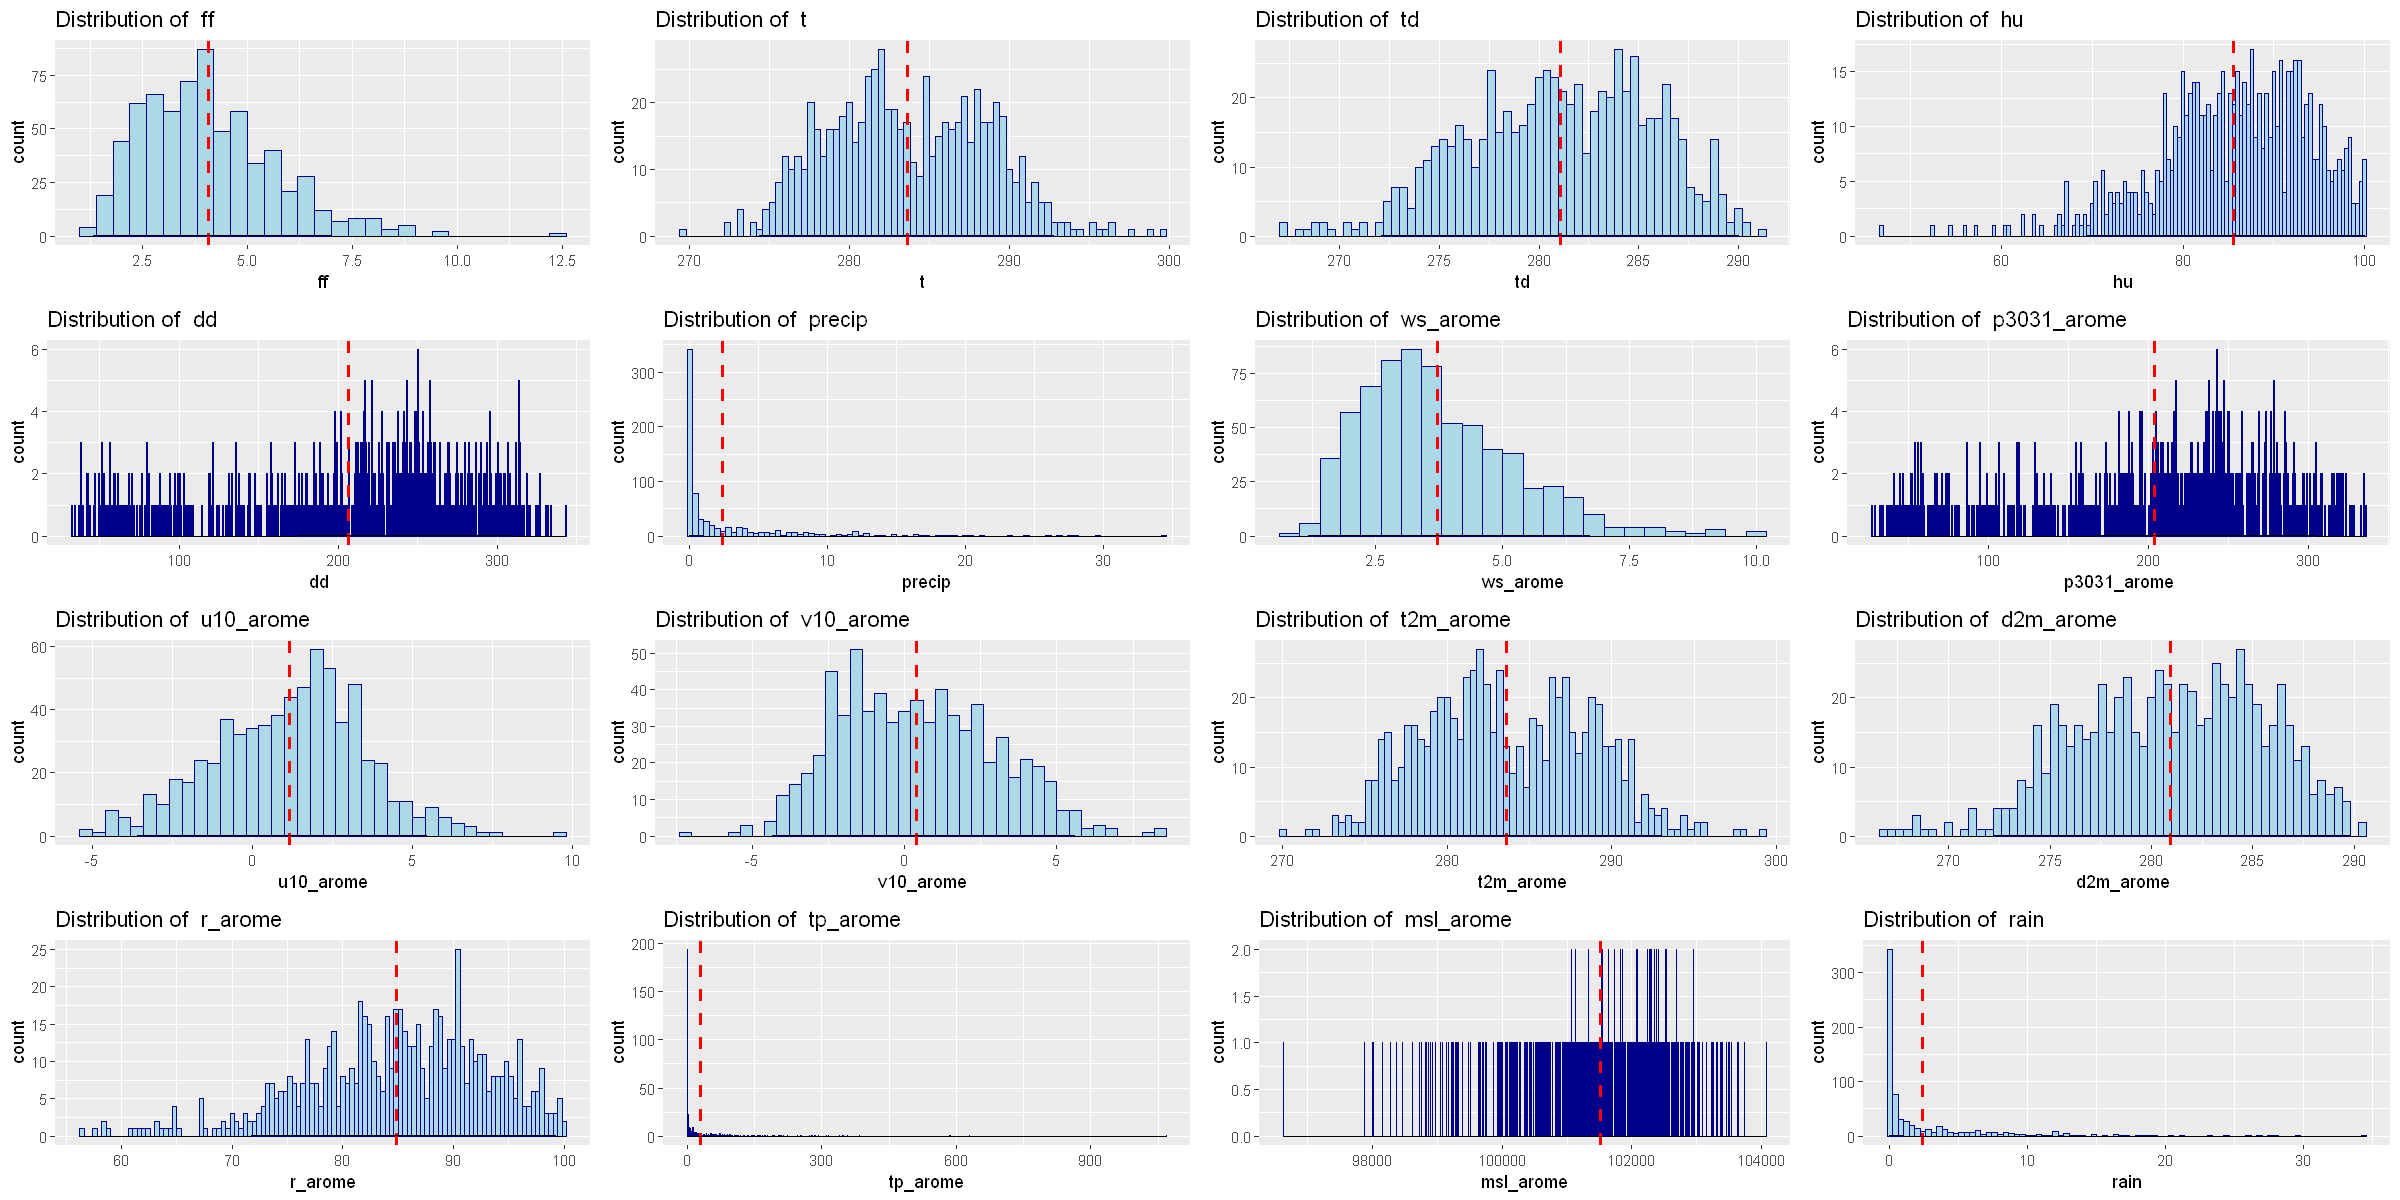

In [91]:
# Use lapply 

my_plots_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # NOTE - aes_string rather than aes
    geom_histogram(binwidth = 0.4, color = "darkblue", fill="lightblue") +
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +
    geom_density(alpha=.8, fill="#FF6666") +
    ggtitle(paste("Distribution of ",each_variable))
})

gridExtra::grid.arrange(grobs = my_plots_list, ncol = 4)

In [61]:
# par(mfrow = c(3, 4))
# p = list()
# for (i in length(num_var))
# {
#     p[[i]] = ColHist(rain, num_var[i])
# }
# gridExtra::grid.arrange(p, nrow = 4)

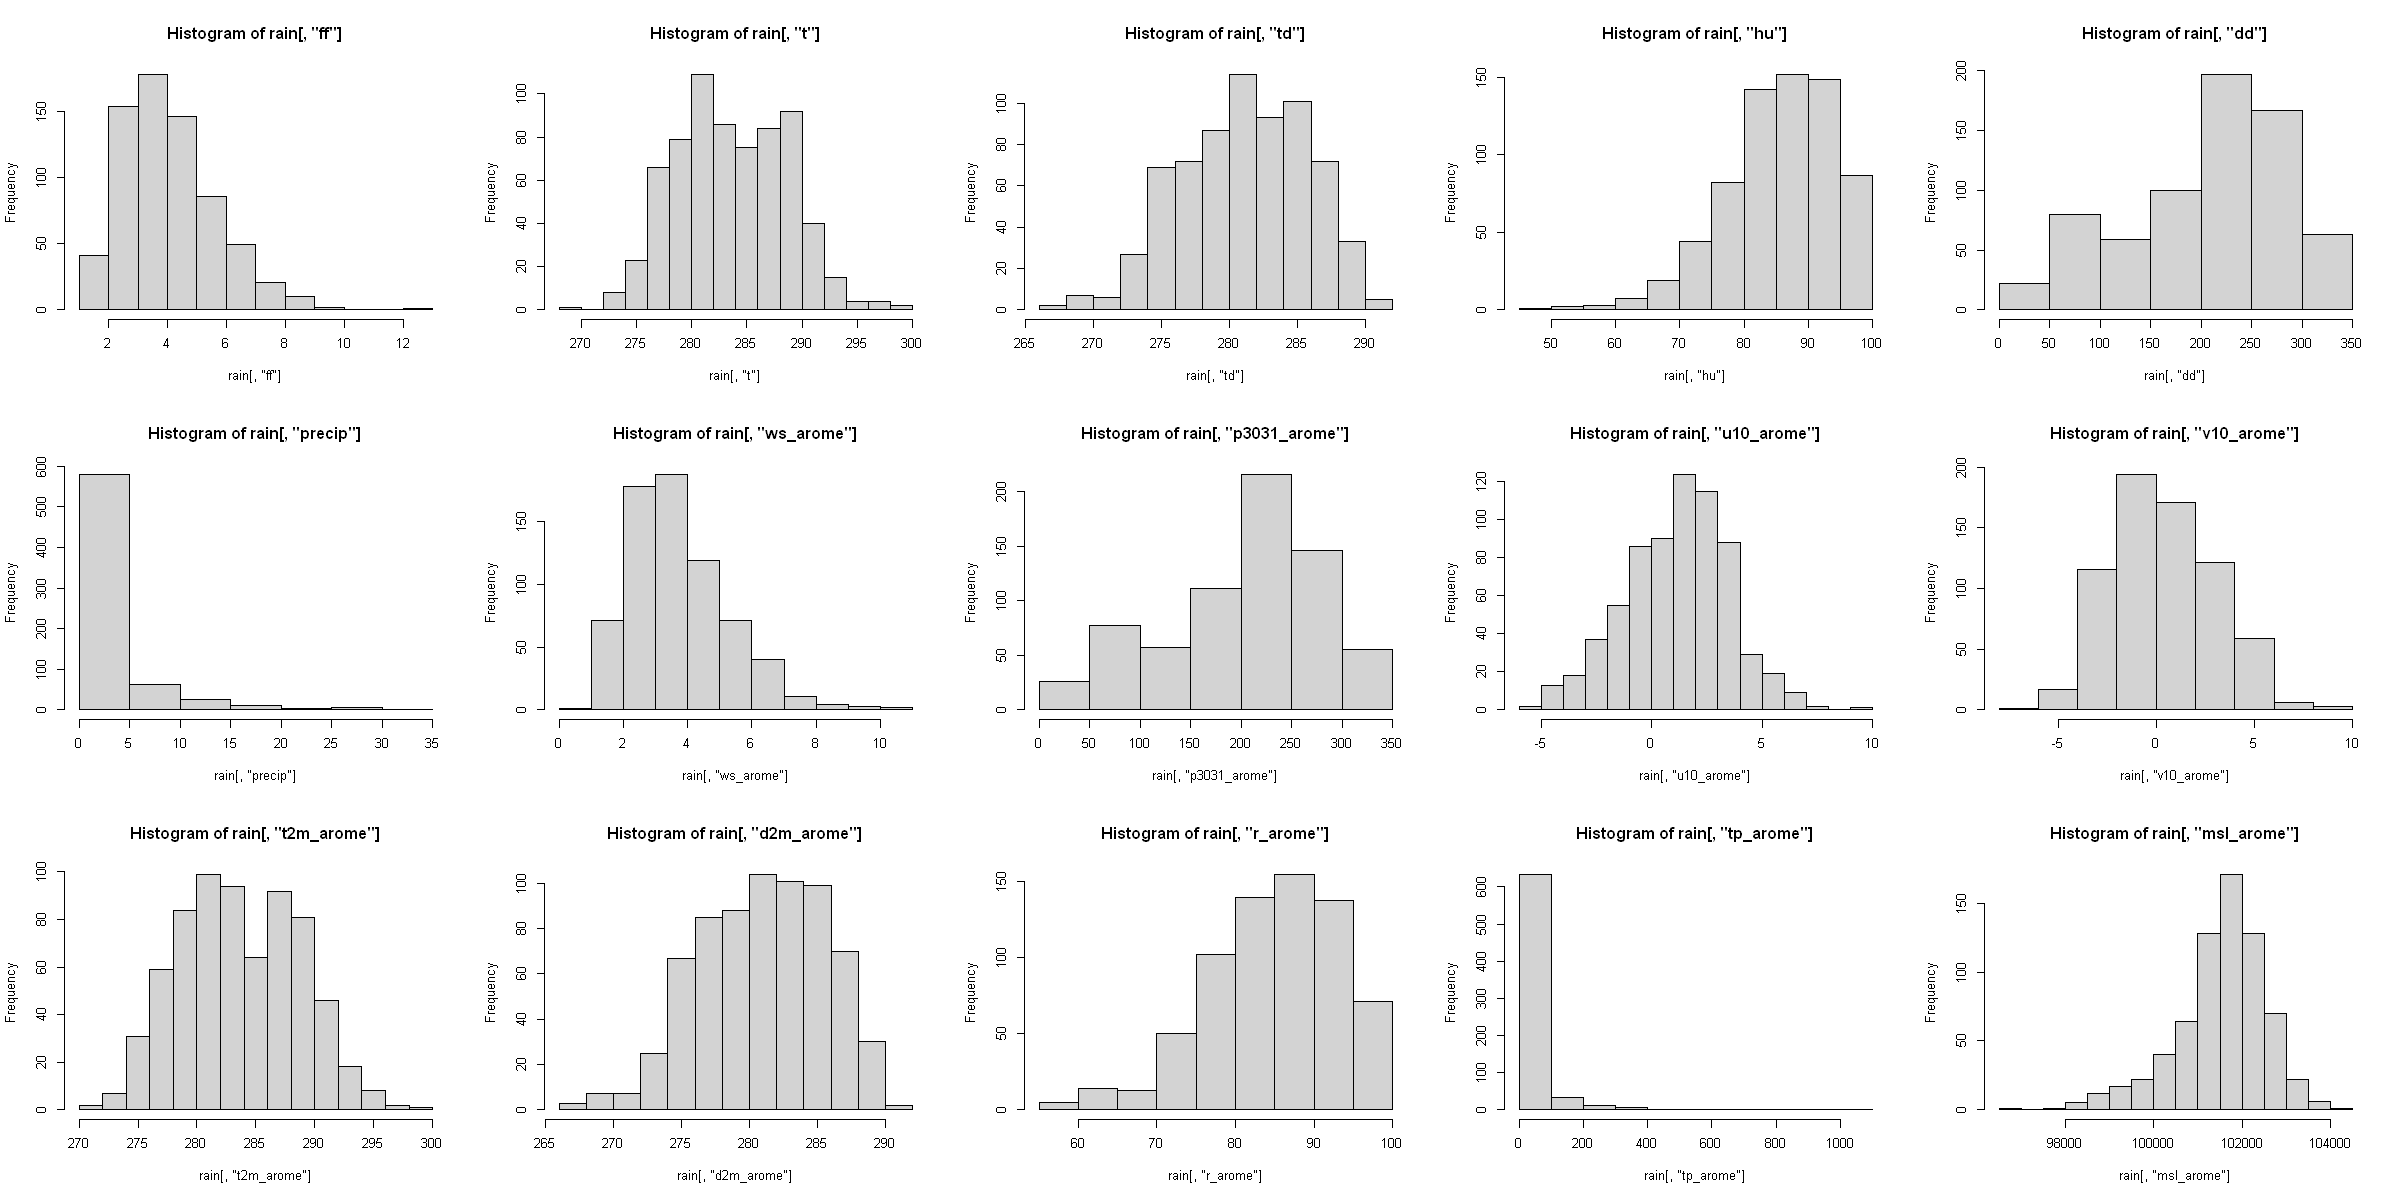

In [15]:
par(mfrow = c(3, 5))
options(repr.plot.width = 20, repr.plot.height = 10)
hist(rain[,'ff']); hist(rain[,'t']); hist(rain[,'td'])
hist(rain[,'hu']); hist(rain[,'dd']); hist(rain[,'precip'])
hist(rain[,'ws_arome']); hist(rain[,'p3031_arome']); hist(rain[,'u10_arome'])
hist(rain[,'v10_arome']); hist(rain[,'t2m_arome']); hist(rain[,'d2m_arome'])
hist(rain[,'r_arome']); hist(rain[,'tp_arome']); hist(rain[,'msl_arome'])


In [16]:
rain[, "precip_log"] <- log(log(rain[, "precip"]))
rain[, "tp_arome_log"] <- log(rain[, "tp_arome"])


Warning message in log(log(rain[, "precip"])):
"NaNs produced"


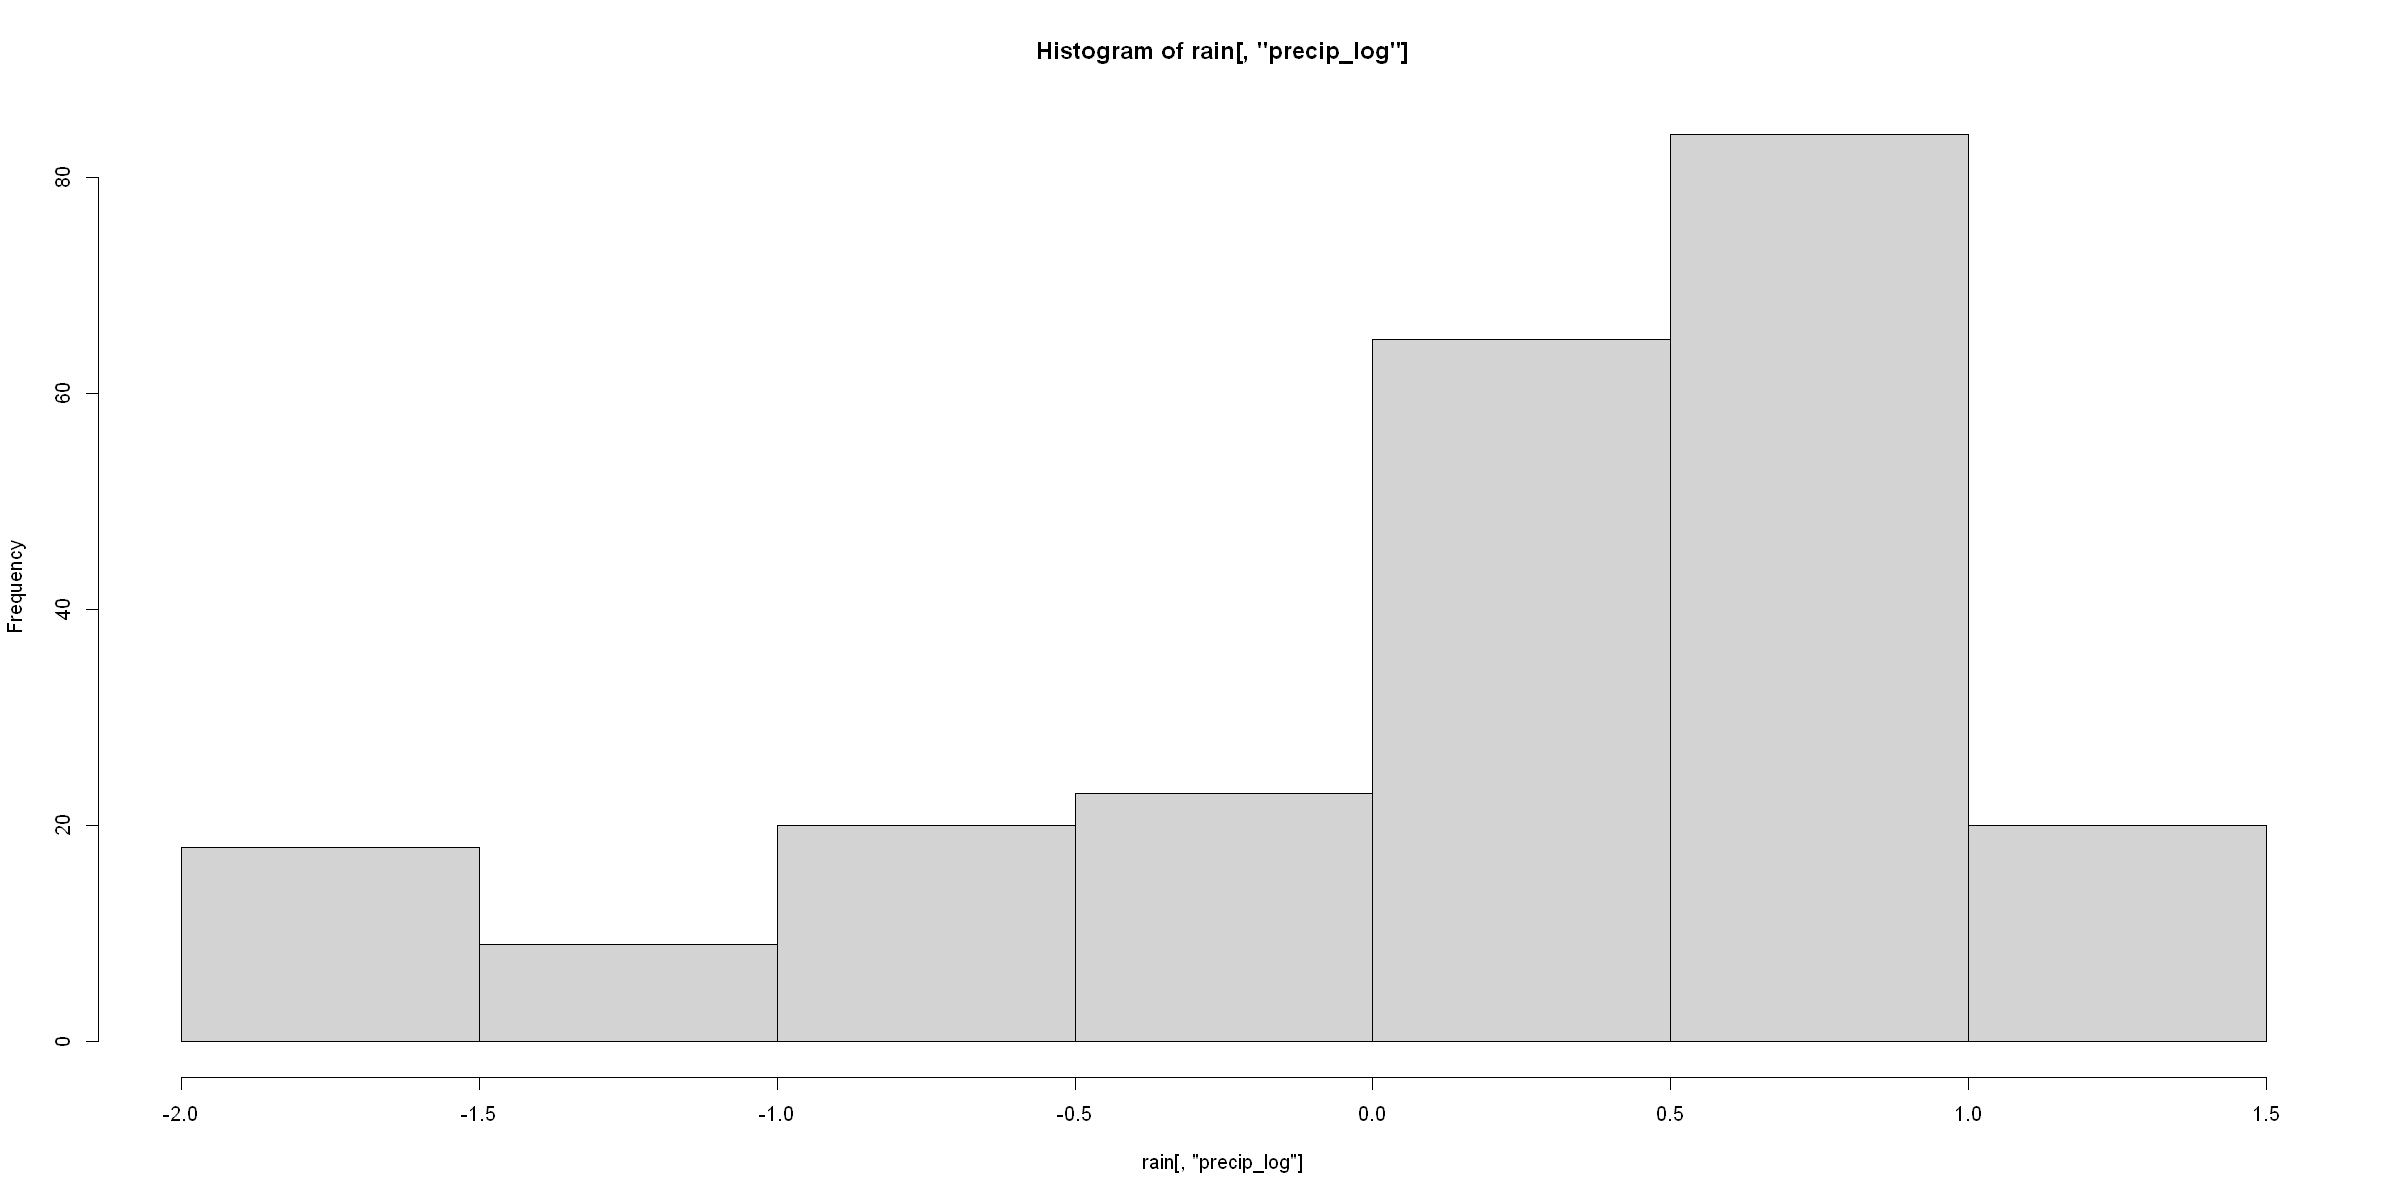

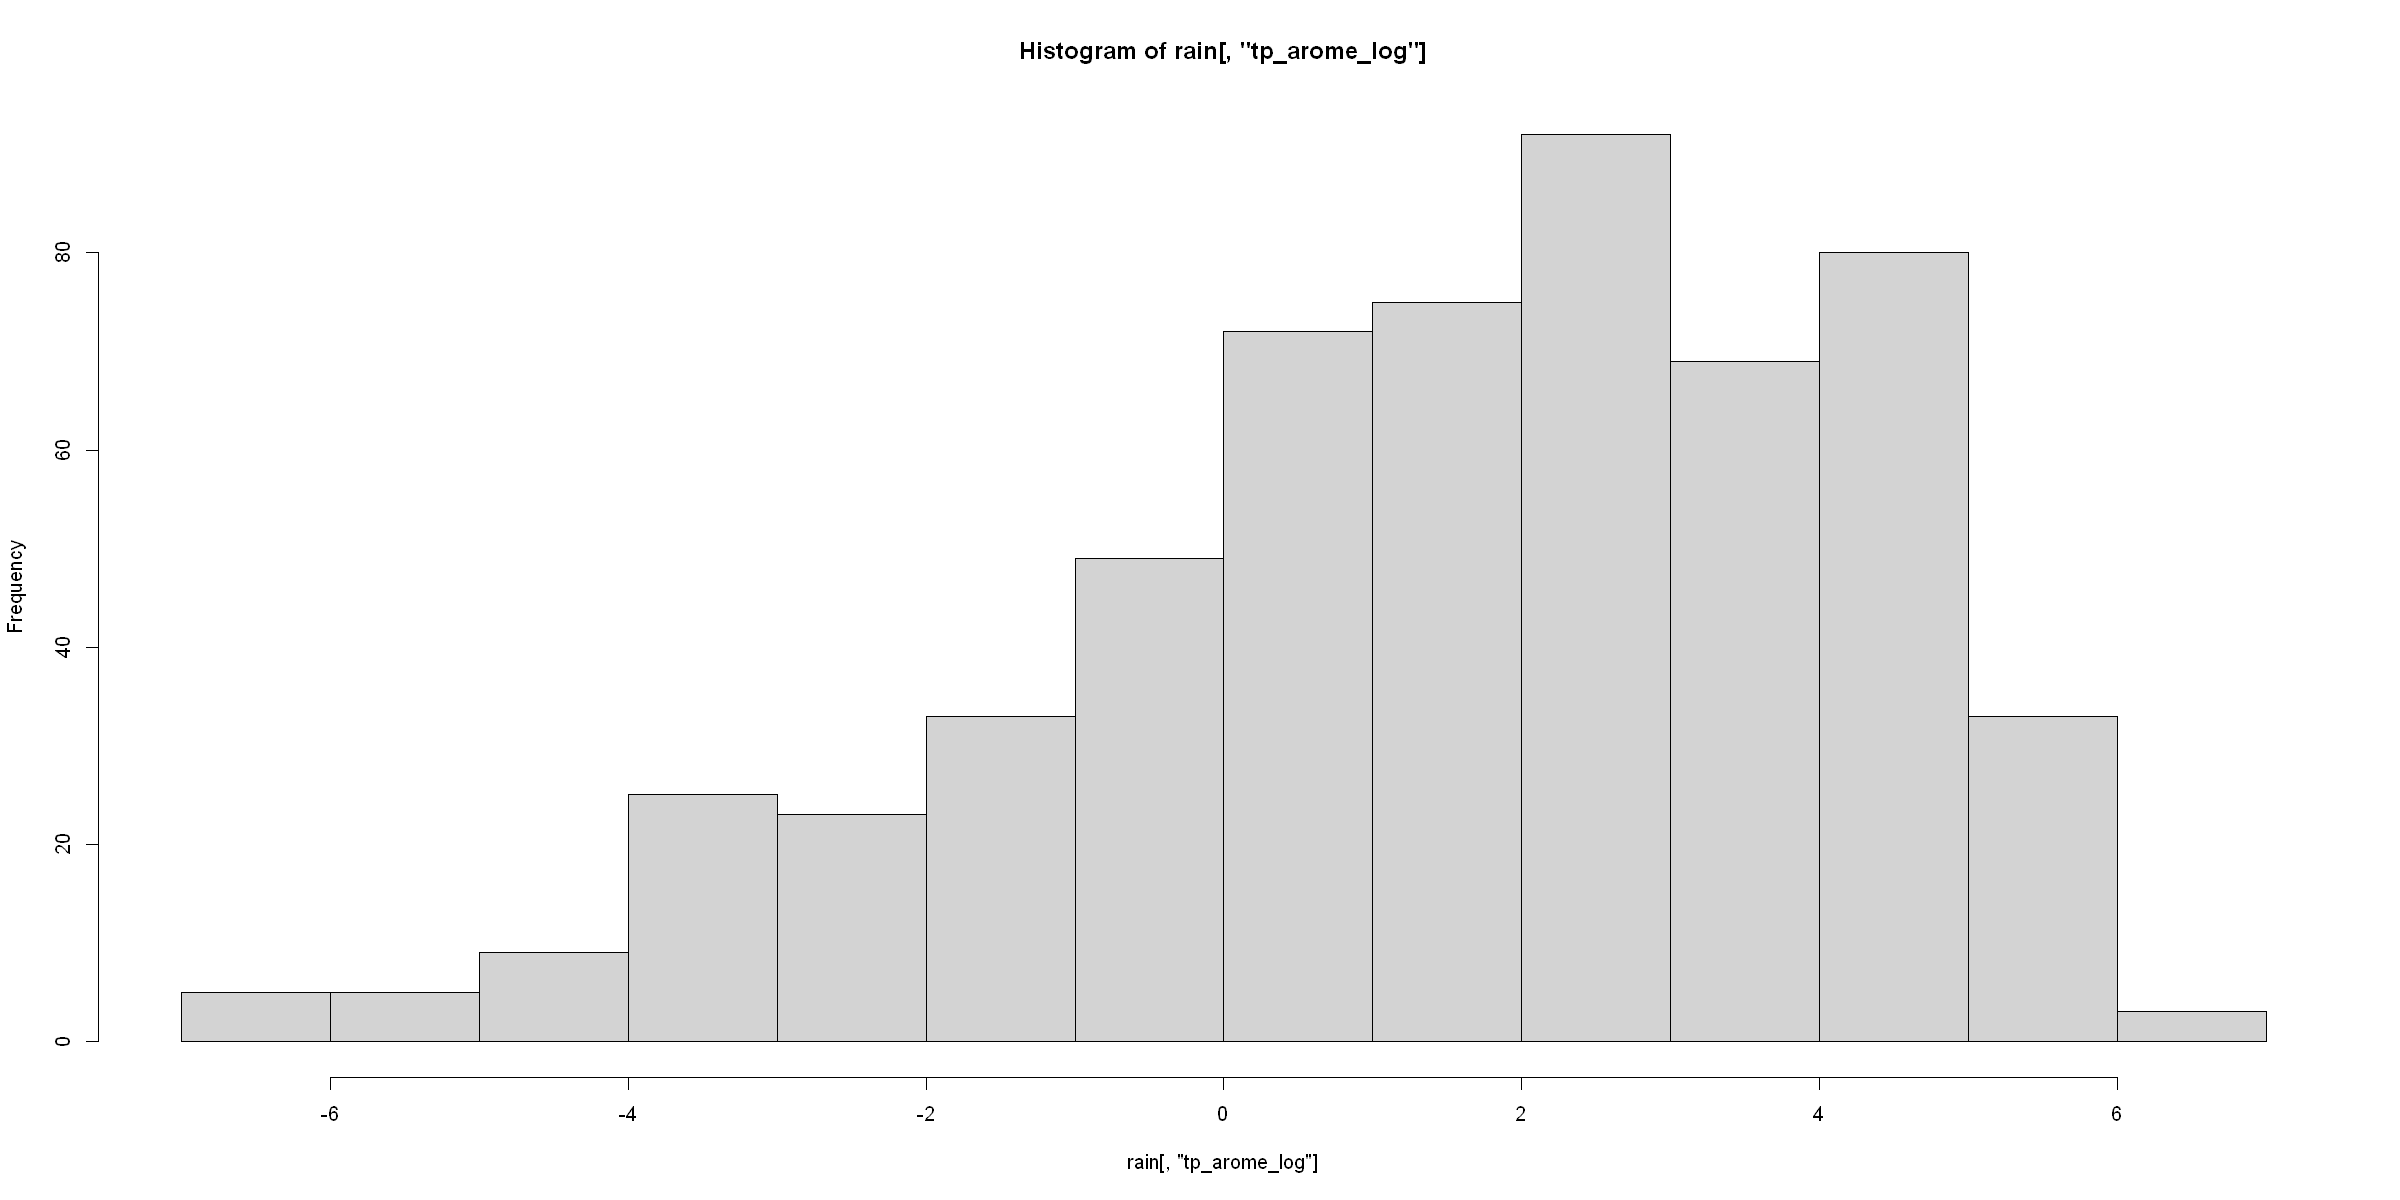

In [17]:
hist(rain[,'precip_log']); hist(rain[,'tp_arome_log'])

In [18]:
log(1070)

[1] 6.975414